Упаковка простой нейросети в D

В данном задании вам нужно обучить нейронную сеть для распознавания цифр из набора MNIST и запаковать ее в Docker-контейнер.  

Этапы выполнения задания:    
1. Обучение нейронной сети на наборе MNIST и сохранение весов
2. Написание скрипта с инференсом обученной модели
3. Подготовка Dockerfile и создание Docker-образа, содержащего: скрипт, веса модели и все необходимые для работы скрипта библиотеки
4. Запуск Docker-контейнера и передача тестовой картинки для распознавания

В результате приложение должно возвращать класс распознанного объекта на изображении.

Точность работы модели здесь не принципиальна, поэтому для решения можно использовать простую полносвязную сеть.

В качестве ответа на задание нужно прислать ноутбук с обучением модели, а также скриншоты командной строки с выполненными командами по созданию Docker-образа, запуску Docker-контейнера и распознаванию изображения.

In [ ]:
# Ваше решение
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений
import keras

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline 

(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
x_train_org.shape

x_train = x_train_org.reshape(x_train_org.shape[0], -1)   
x_test = x_test_org.reshape(x_test_org.shape[0], -1)   

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')



11501568/11490434 [==============================] - 0s 0us/step
Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [ ]:
#class balance check
classes=np.zeros((10))
for val in y_train_org:
  classes[val]+=1
print(classes)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [ ]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [ ]:
CLASS_COUNT = 10

# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)
print(y_train.shape)
print(y_train_org.shape)



(60000, 10)
(60000,)


In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='tanh')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


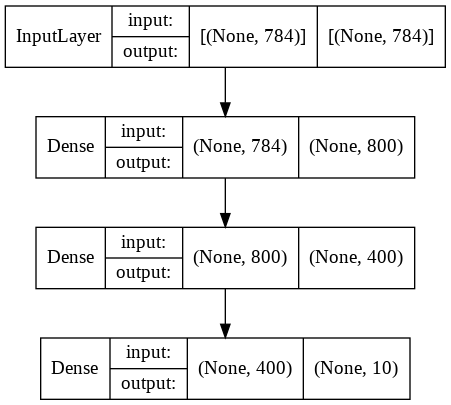

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 10s 20ms/step - loss: 0.2009 - accuracy: 0.9393
Epoch 2/15
469/469 [==============================] - 10s 22ms/step - loss: 0.0744 - accuracy: 0.9769
Epoch 3/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0463 - accuracy: 0.9855
Epoch 4/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0337 - accuracy: 0.9892
Epoch 5/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0285 - accuracy: 0.9904
Epoch 6/15
469/469 [==============================] - 9s 18ms/step - loss: 0.0235 - accuracy: 0.9919
Epoch 7/15
469/469 [==============================] - 8s 18ms/step - loss: 0.0168 - accuracy: 0.9942
Epoch 8/15
469/469 [==============================] - 9s 18ms/step - loss: 0.0150 - accuracy: 0.9948
Epoch 9/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0155 - accuracy: 0.9948
Epoch 10/15
469/469 [==============================] - 9s 18ms/step - loss: 0.0130 - accu

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
model.save('/content/drive/MyDrive/NN/DockerMINST.h5')

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/NN/DockerMINST.h5")

In [ ]:
from tensorflow.keras.models import load_model
MODEL_NAME =   'DockerMINST.h5'
import numpy as np
from PIL import Image 
import argparse                                 # Модуль для извлечения аргументов, передаваемых скрипту через командную строку
model = load_model(MODEL_NAME)                                              # Загрузка весов модели
INPUT_SHAPE = (28, 28, 1)

def process(image_file):
    image = Image.open(image_file).resize((INPUT_SHAPE[0], INPUT_SHAPE[1])).convert('L')  # Открытие обрабатываемого файла
    resized_image = image          # Изменение размера изображения в соответствии со входом сети
    #print(np.array(resized_image).shape)
    array = np.array(resized_image).reshape((1,INPUT_SHAPE[0]*INPUT_SHAPE[1]))   # Регулировка формы тензора для подачи в сеть
    array = 255-array
    array=array/255
    prediction = np.argmax(model.predict(array))             # Запуск предсказания сети
    return prediction
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='path')  # Создаем парсер для аргументов, переданных через командную строку
    parser.add_argument('path', type=str, help='File name with path')
    args = parser.parse_args()                                              # Парсим аргументы
    ImagePath = args.path                                              # Извлекаем первое число
    prediction=process(ImagePath)
    print("Recognized number:",prediction)

Скрипт контейнера

In [ ]:
cnt = '''
from tensorflow.keras.models import load_model
MODEL_NAME =   'DockerMINST.h5'
import numpy as np
from PIL import Image 
import argparse                                 # Модуль для извлечения аргументов, передаваемых скрипту через командную строку
model = load_model(MODEL_NAME)                                              # Загрузка весов модели
INPUT_SHAPE = (28, 28, 1)

def process(image_file):
    image = Image.open(image_file).resize((INPUT_SHAPE[0], INPUT_SHAPE[1])).convert('L')  # Открытие обрабатываемого файла
    resized_image = image          # Изменение размера изображения в соответствии со входом сети
    #print(np.array(resized_image).shape)
    array = np.array(resized_image).reshape((1,INPUT_SHAPE[0]*INPUT_SHAPE[1]))   # Регулировка формы тензора для подачи в сеть
    array = 255-array
    array=array/255
    prediction = np.argmax(model.predict(array))             # Запуск предсказания сети
    return prediction
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='path')  # Создаем парсер для аргументов, переданных через командную строку
    parser.add_argument('path', type=str, help='File name with path')
    args = parser.parse_args()                                              # Парсим аргументы
    ImagePath = args.path                                              # Извлекаем первое число
    prediction=process(ImagePath)
    print("Recognized number:",prediction)
'''
# Сохранение кода в файл. Overwrite file
with open('mu_script.py', 'w') as file:
    file.write(cnt)
from google.colab import files
files.download("mu_script.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Скрипт запуска контейнера.

In [ ]:
cnt = '''
FROM python:3.8
RUN pip install pillow
RUN pip install numpy
RUN pip install argparse
RUN pip install tensorflow
RUN pip install keras
ADD mu_script.py /
COPY 00.png /
COPY 01.png /
COPY 02.png /
COPY 03.png /
COPY 04.png /
COPY 05.png /
COPY 06.png /
COPY 07.png /
COPY 08.png /
COPY 09.png /
COPY DockerMINST.h5 /

'''
# Сохранение кода в файл. Overwrite file
with open('Dockerfile', 'w') as file:
    file.write(cnt)
from google.colab import files
files.download("Dockerfile")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Скрины работы контейнера

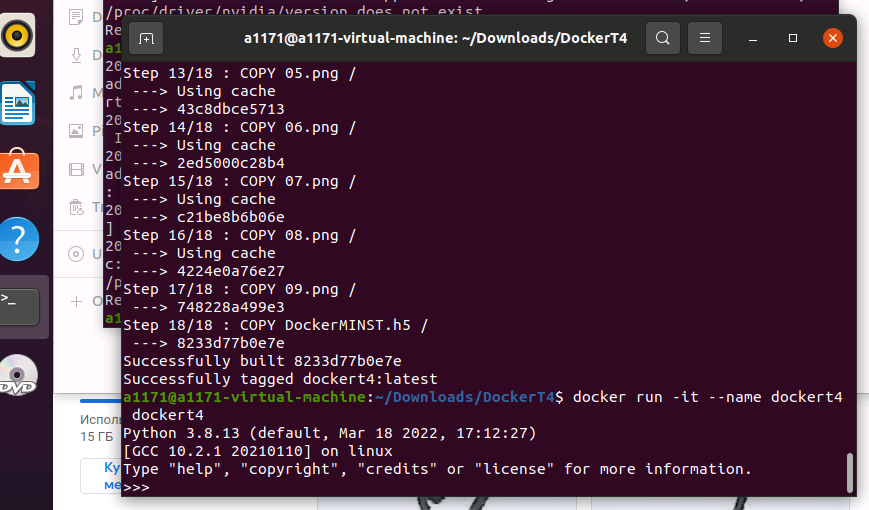

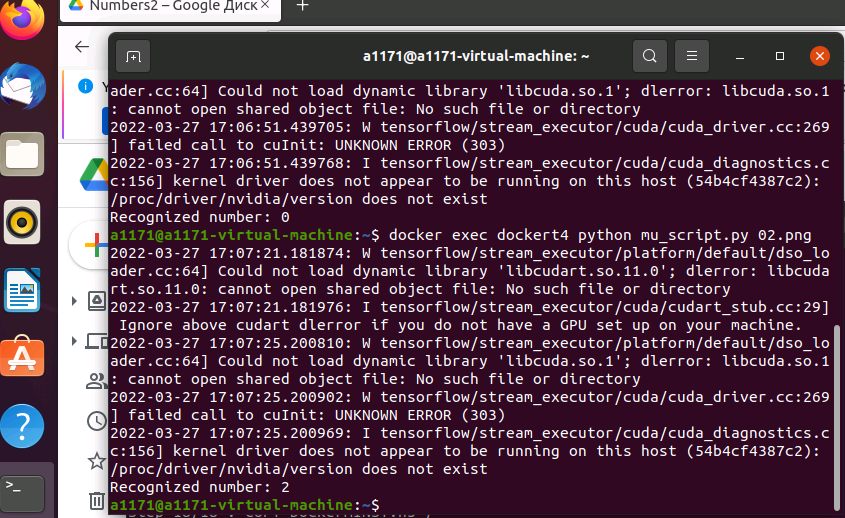